References used:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html
* https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e

Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer


## (a) Data exploration

#### Load the data

In [2]:
file_path = 'data.csv'
credit_card_data = pd.read_csv(file_path)
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credit_card_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Description of columns
1. CUST_ID: Identification of Credit Card holder
2. BALANCE: Balance amount left in their account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated
4. PURCHASES: Amount of purchases made from account
5. ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., in a single attempt)
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: Frequency of purchases
9. ONEOFF_PURCHASES_FREQUENCY : Frequently of purchases happening in one-go
10. PURCHASES_INSTALLMENTS_FREQUENCY : Frequency of purchases happening in in- stallments
11. CASH_ADVANCE_FREQUENCY : Frequency of cash being paid in advance
12. CASH_ADVANCE_TRX: Number of transactions made with "Cash in Advanced"
13. PURCHASES_TRX: Number of purchase transactions being made
14. CREDIT_LIMIT: Credit card limit for the user
15. PAYMENTS: Amount of payment made by the user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by the user
17. PRC_FULL_PAYMENT: Percent of full payment made by the user
18. TENURE: Tenure of credit card service for the user

* Based on percentile values of features, it may be said that CASH_ADVANCE_TRX, PURCHASES_TRX and TENURE features may not be continuous. For confirmation, we would need to prove this hypothesis.

* Looking at count of features, there are missing values in the CREDIT_LIMIT and MINIMUM_PAYMENTS columns.

* Looking at the percentiles, the distributions of some features are heavily skewed and require more detailed analysis.

#### Missing information?

In [4]:
credit_card_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

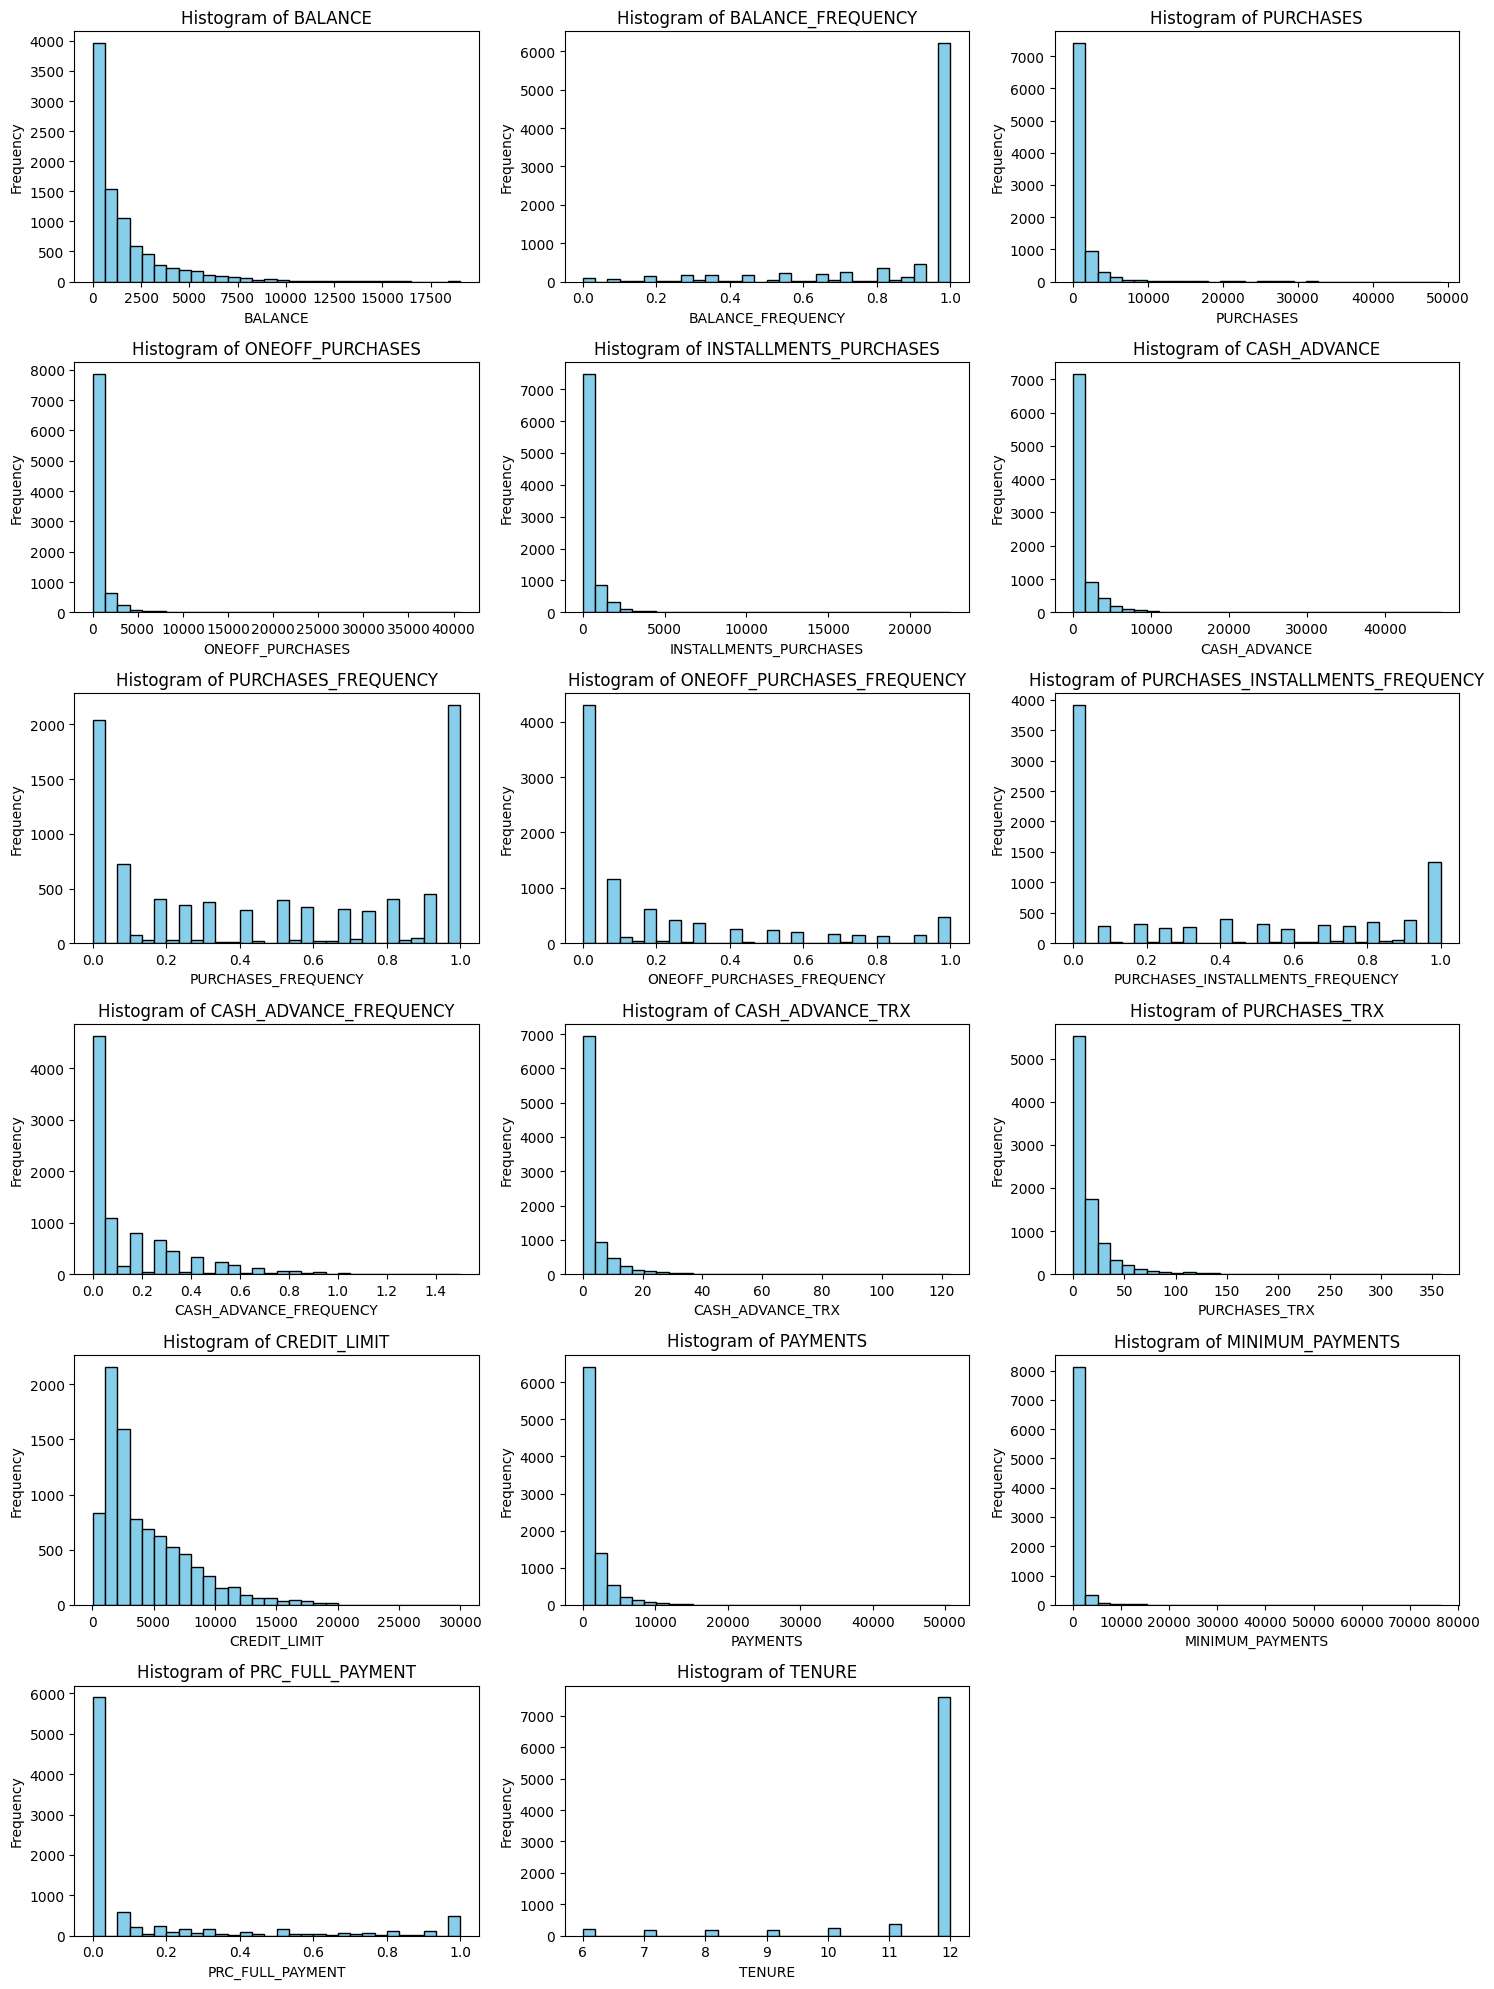

In [5]:

# Select columns 2 to 18 (indexing starts from 1)
selected_columns = credit_card_data.iloc[:, 1:]

# Plot histograms for each column
plt.figure(figsize=(15, 20))
for i, column in enumerate(selected_columns.columns, start=1):
    plt.subplot(6, 3, i)
    plt.hist(selected_columns[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Provide a brief discussion on your intuition regarding the variables and the resulting histograms.

All columns except PURCHASES_FREQUENCY do not have a balanced distribution. PURCHASES_FREQUENCY does not have a normal distribution. Many other columns are also not normalized.
As clear from the histograms, there is a significant skewness in many features. Conventional clustering algorithms might not be efficient enough. A more detailed examination is needed to identify outliers.

Check for outliers:
Using IQR, we can follow the below approach to find outliers:

1. Calculate the first and third quartile (Q1 and Q3).
2. Further, evaluate the interquartile range, IQR = Q3-Q1.
3. Estimate the lower bound, the lower bound = Q1*1.5
4. Estimate the upper bound, upper bound = Q3*1.5
5. The data points that lie outside of the lower and the upper bound are outliers.

In [6]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [7]:
non_categorical_data = credit_card_data.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


Clearly, in some features like BALANCE_FREQUENCY, PRC_FULL_PAYMENT and TENURE, the percentage of outliers is quite high. In some features like PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY, there are no outliers. In the remaining features, there are some outliers.


## b. Data exploration.

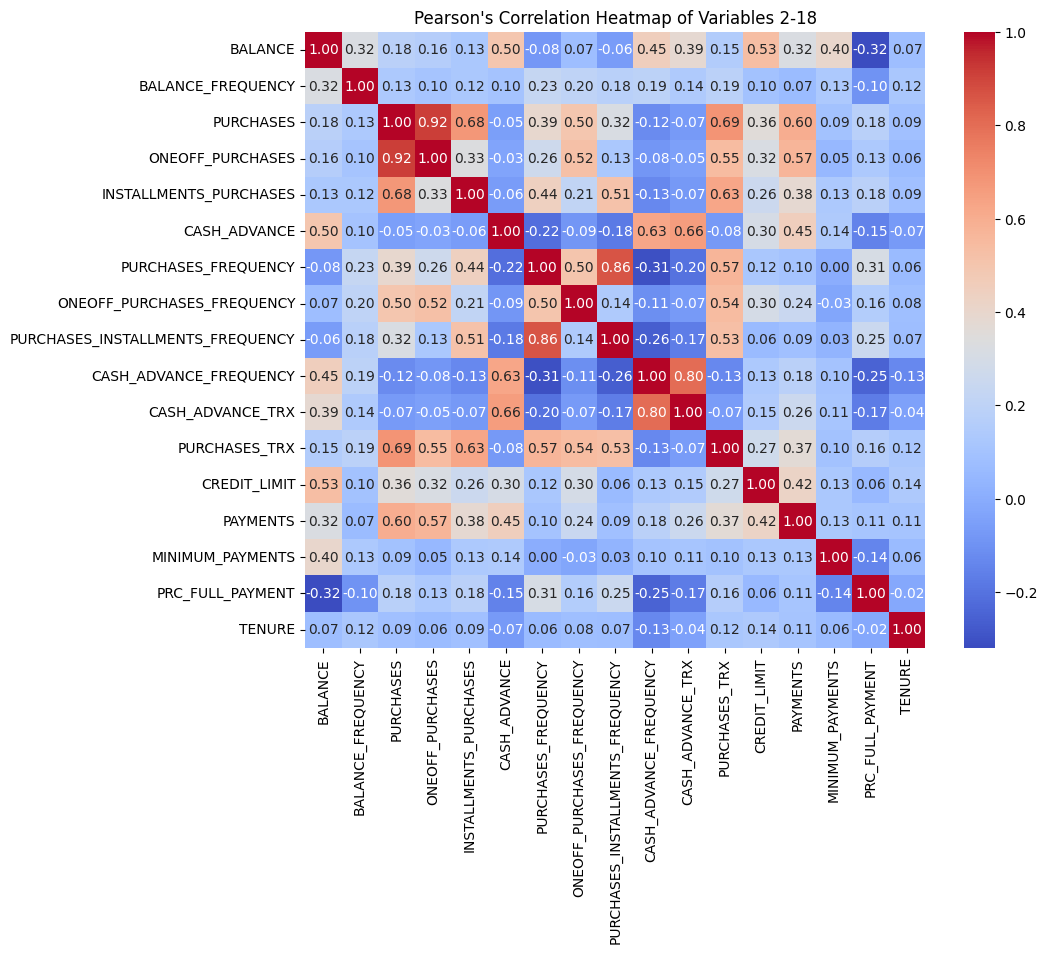

In [8]:
# Compute Pearson's correlation matrix
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap of Variables 2-18")
plt.show()

Discuss potential associations between the considered variables

As expected by the column definitions and visible in the heatmap, there is:
* very high correlation (0.92) between PURCHASES and ONEOFF_PURCHASES.
* very high correlation (0.86) between PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY.
* very high correlation (0.80) between CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY.
* high correlation (0.69) between PURCHASES and PURCHASES_TRX.
* high correlation (0.68) between INSTALLMENTS_PURCHASES and PURCHASES_TRX.
* high correlation (0.63) between INSTALLMENTS_PURCHASES and PURCHASES_TRX.

Significant positive relationship with each other:
* balance to credit limit
* one-off purchases to payments
* purchases to installment purchases
* purchase to one-off purchases
* purchases frequency to purchases installments frequency
* cash advance to cash advance frequency
* cash advance to cash advance transactions
* payments to purchases
* purchase transactions to purchases
* purchase transactions to one-off purchases
* purchase transactions to installments purchases.

Medium positive relationship with each other:
* credit limit to payments
* balance to cash advance
* balance to balance frequency
* balance to cash advance frequency
* balance to cash advance transactions
* balance to payments
* balance to minimum payments
* purchases to purchases frequency
* purchases to purchases installments frequency
* purchases to credit limit

Percent of total charge paid by user has a moderate negative relationship with balance and cash advance frequency.



## c. K-Means Clustering

K-Means is a clustering algorithm used to divide data into `k` clusters by randomly initializing each cluster center, and then iteratively updating these centers to be the average of the data points in the clusters. This process continues until a defined criterion is met.

The elbow method is a common technique used for determining how many clusters the data should be divided into. This method involves calculating the total within-cluster sum of squares (WCSS) for different k values. As the value of k increases, WCSS decreases. However, after a certain k value, this reduction amount becomes insignificant. This point called the **elbow** helps us to determine the optimal k value.

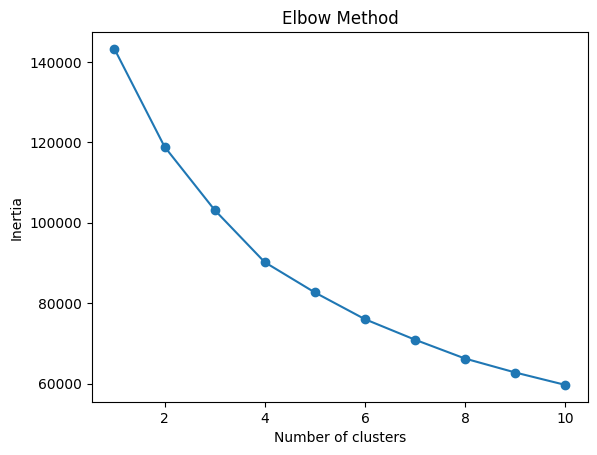

In [9]:
# Select relevant columns for clustering (2-16)
columns_for_clustering = credit_card_data.columns[1:17]  # Exclude 'CUST ID', 'PRCFULLPAYMENT', 'TENURE'

# Extract the relevant data for clustering
X = credit_card_data[columns_for_clustering].values

# Replace missing values with the mean, otherwise it will give NaN error in K-Means clustering
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature normalization
# StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1. This is also known as z-score normalization.
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):  # Testing for clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)


# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


The plot shows the inertia values for different values of K. It looks like the "elbow" point is K=4 where the inertia starts decreasing more slowly. This point indicates a good balance between minimizing inertia and not having too many clusters.

### Double-check the elbow point with KneeLocator library

In [10]:
!pip install kneed

In [11]:
from kneed import KneeLocator

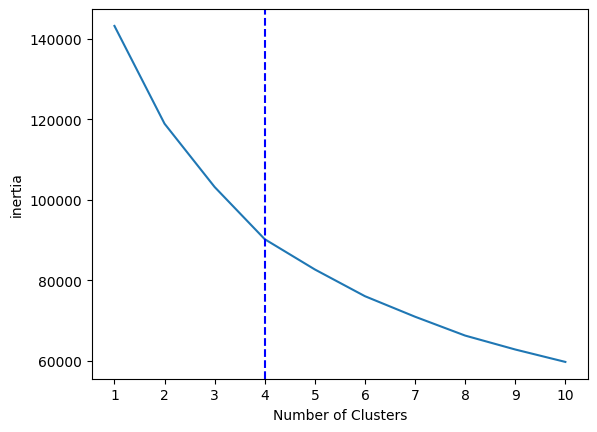

In [12]:
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.axvline(x=kl.elbow, color="b", label="axvline - full height", ls="--")
plt.show()

In [13]:
# Using K* (optimal number of clusters)
optimal_k = 4

# Perform K-Means clustering with K*
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_normalized)

# Assign clusters to each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
credit_card_data['Cluster'] = cluster_labels

# Number of users assigned to each cluster
users_per_cluster = credit_card_data['Cluster'].value_counts().sort_index()
print("Number of users assigned to each cluster:")
print(users_per_cluster)

# Calculate centroids of each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns_for_clustering) # selected_columns.columns)
print("\nCentroid of each cluster (average value of each feature per cluster):")
print(centroids)

# Calculate scatter of each cluster (average distance of each sample to the centroid)
cluster_scatter = []
for i in range(optimal_k):
    cluster_data = X_normalized[cluster_labels == i]
    centroid = kmeans.cluster_centers_[i]
    scatter = np.mean(np.linalg.norm(cluster_data - centroid, axis=1))
    cluster_scatter.append(scatter)

print("\nScatter of each cluster:")
for i, scatter in enumerate(cluster_scatter):
    print(f"Cluster {i}: {scatter:.4f}")


Number of users assigned to each cluster:
0     402
1    3990
2    1198
3    3360
Name: Cluster, dtype: int64

Centroid of each cluster (average value of each feature per cluster):
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.959732           0.463638   3.157369          2.741891   
1 -0.265295          -0.368757  -0.342742         -0.230400   
2  1.462830           0.386074  -0.233574         -0.163054   
3 -0.321339           0.244591   0.112395          0.003619   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                2.428413     -0.156699             1.134529   
1               -0.386925     -0.182651            -0.795277   
2               -0.252811      1.689067            -0.503201   
3                0.258878     -0.366532             0.987538   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.801488                          1.061848   
1                   -0.389084                   

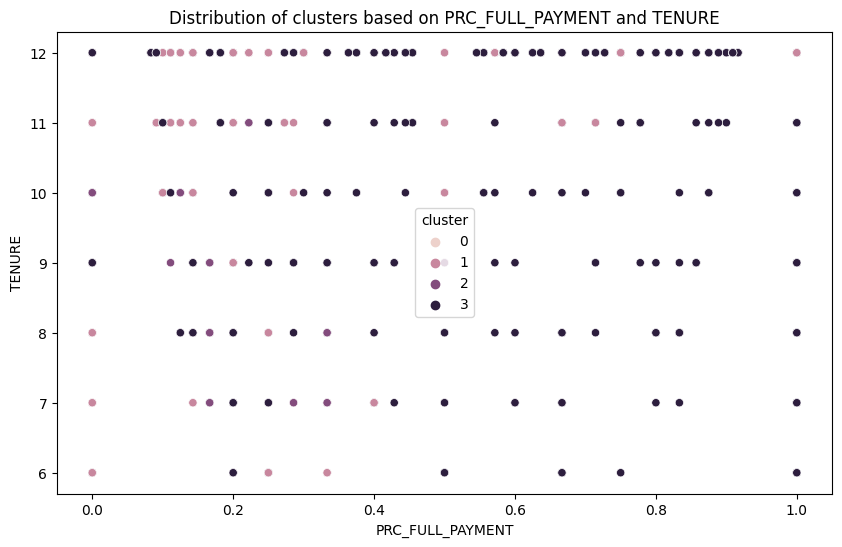

In [14]:
clusters_1=pd.concat([credit_card_data, pd.DataFrame({'cluster':cluster_labels})], axis=1)
clusters_1.head()
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters_1, x='PRC_FULL_PAYMENT', y='TENURE', hue='cluster')
plt.title('Distribution of clusters based on PRC_FULL_PAYMENT and TENURE')
plt.show()

Discuss your findings in association to users' percent of full payment (variable 17) and tenure of credit card service (variable 18).

* Cluster Sizes: Clusters 1 and 3 are notably larger than Clusters 0 and 2. These larger clusters might represent more common spending patterns among the users.
* Centroid Analysis:
  * Cluster 0 seems to have higher average values in most features, indicating potentially higher balances, more frequent purchases, and larger credit limits compared to other clusters.
  * Cluster 1 appears to have lower average values across most features, suggesting a group with lower balances, less frequent purchases, and lower credit limits.
  * Cluster 2 shows higher cash advance and lower purchase-related averages, potentially indicating users who use their credit cards primarily for cash advances rather than purchases.
  * Cluster 3 demonstrates moderate values across most features, falling between Clusters 0 and 1.

* Relationship to Percent of Full Payment and Tenure: Analyzing how clusters relate to the percent of full payment (PRCFULLPAYMENT) and tenure (TENURE) could provide deeper insights.
  * Cluster 0 might have a higher percentage of users making full payments due to higher average payments and potentially higher credit limits.
  * Clusters 1 and 2 might have users with lower percentages of full payments due to their lower average payment amounts and different spending behaviors.

## d. K-Means Clustering

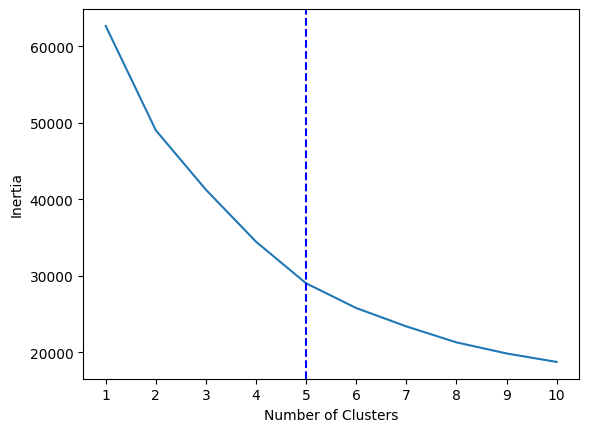

In [15]:
# Selecting different combination of features which are less correlated with each other
selected_features = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Extract the selected data for clustering
X_selected = credit_card_data[selected_features].values
# Replace missing values with the mean, otherwise it will give NaN error in K-Means clustering
imputer = SimpleImputer(strategy='mean')
X_selected_imputed = imputer.fit_transform(X_selected)

# Feature normalization
scaler_selected = StandardScaler()
X_selected_normalized = scaler_selected.fit_transform(X_selected_imputed)

# Using the elbow method to find the optimal number of clusters for the new set of features
interia_selected = []
for i in range(1, 11):
    kmeans_selected = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_selected.fit(X_selected_normalized)
    interia_selected.append(kmeans_selected.inertia_)

kl = KneeLocator(range(1, 11), interia_selected, curve="convex", direction="decreasing")
kl.elbow
plt.plot(range(1, 11), interia_selected)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.axvline(x=kl.elbow, color="b", label="axvline - full height", ls="--")
plt.show()


The optimal k value is now 5.

In [19]:
# Using K* (optimal number of clusters)
optimal_k = 5

# Perform K-Means clustering with K*
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_selected.fit(X_selected_normalized)

# Assign clusters to each data point
cluster_labels_selected = kmeans_selected.labels_

# Add cluster labels to the original dataset
credit_card_data['Cluster'] = cluster_labels_selected

# Number of users assigned to each cluster
users_per_cluster_selected = credit_card_data['Cluster'].value_counts().sort_index()
print("Number of users assigned to each cluster:")
print(users_per_cluster_selected)

# Calculate centroids of each cluster
centroids_selected = pd.DataFrame(kmeans_selected.cluster_centers_, columns=selected_features)
print("\nCentroid of each cluster (average value of each feature per cluster):")
print(centroids_selected)

# Calculate scatter of each cluster (average distance of each sample to the centroid)
cluster_scatter_selected = []
for i in range(optimal_k):
    cluster_data_selected = X_selected_normalized[cluster_labels_selected == i]
    centroid_selected = kmeans_selected.cluster_centers_[i]
    scatter_selected = np.mean(np.linalg.norm(cluster_data_selected - centroid_selected, axis=1))
    cluster_scatter_selected.append(scatter_selected)

print("\nScatter of each cluster:")
for i, scatter in enumerate(cluster_scatter_selected):
    print(f"Cluster {i}: {scatter:.4f}")


Number of users assigned to each cluster:
0     706
1    5498
2    1358
3     121
4    1267
Name: Cluster, dtype: int64

Centroid of each cluster (average value of each feature per cluster):
    BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
0 -0.321011  -0.266910      0.078865     -0.534910 -0.378741   
1 -0.248287  -0.169695     -0.237513     -0.336564 -0.230687   
2  1.664511   0.155459      1.127966      1.260397  0.581775   
3  1.558779   4.827403      2.024619      2.199380  5.783735   
4 -0.675129   0.257708     -0.414540      0.198838  0.036811   

   PRC_FULL_PAYMENT    TENURE  
0         -0.020468 -3.098222  
1         -0.385829  0.281729  
2         -0.455124  0.225769  
3          0.634790  0.230993  
4          2.112799  0.239776  

Scatter of each cluster:
Cluster 0: 1.5909
Cluster 1: 1.0361
Cluster 2: 2.3286
Cluster 3: 6.5966
Cluster 4: 1.5495


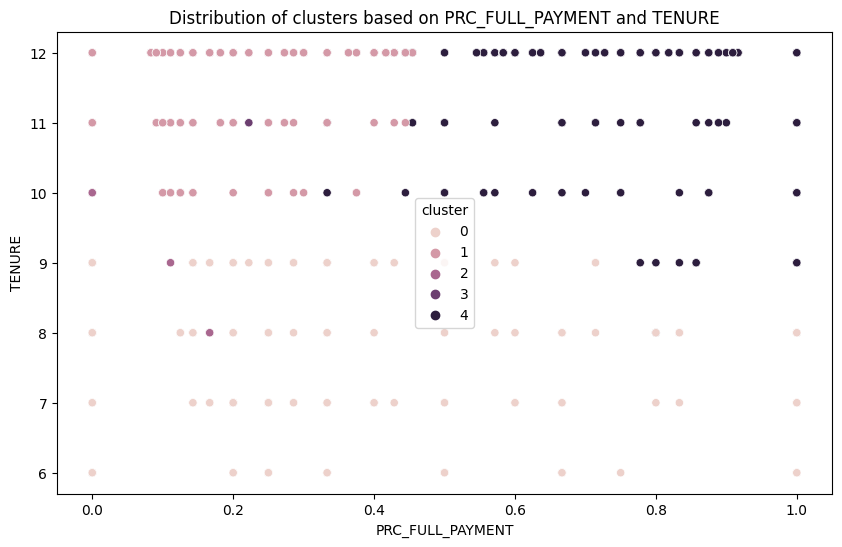

In [20]:
clusters_2=pd.concat([credit_card_data, pd.DataFrame({'cluster':cluster_labels_selected})], axis=1)
clusters_2.head()
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters_2, x='PRC_FULL_PAYMENT', y='TENURE', hue='cluster')
plt.title('Distribution of clusters based on PRC_FULL_PAYMENT and TENURE')
plt.show()

### Centroid Analysis:
- **Balance and Spending Behavior:**
  - Clusters 2 and 3 have notably higher average values in BALANCE, PURCHASES, CASH_ADVANCE, and CREDIT_LIMIT compared to the other clusters, indicating higher balances and more significant transaction amounts.
  - Cluster 0 shows lower average values across these features, suggesting users with lower balances and spending patterns.
  - Cluster 4 displays moderate values, falling between the high and low spending behavior clusters.

- **Payment Behavior:**
  - Clusters 2 and 3 exhibit lower average payments compared to the other clusters.
  - Cluster 4 also demonstrates lower average payments, but higher than Clusters 2 and 3.

- **Percent of Full Payment and Tenure:**
  - **Cluster 3** stands out with a notably higher PRC_FULL_PAYMENT, indicating a higher percentage of full payments compared to other clusters.
  - **Cluster 0** shows a slightly positive PRC_FULL_PAYMENT value, albeit close to zero.
  - **Clusters 1, 2, and 4** exhibit negative PRC_FULL_PAYMENT values, indicating a lower percentage or no full payments made.

### Association with Tenure:
- Clusters 0, 1, 2, and 4 demonstrate tenure values around zero, indicating a relatively similar tenure.
- Cluster 3 shows a significantly negative tenure value, possibly suggesting newer users.

### Conclusion:
- **Payment Behavior vs. Full Payment Percentage:** The cluster with the highest PRC_FULL_PAYMENT (Cluster 3) exhibits lower average payments but a higher percentage of full payments. This might indicate a group of users who prefer to make full payments despite smaller transaction amounts.
- **Balances and Spending Patterns:** Clusters 2 and 3 with higher balances and spending patterns exhibit varied payment behaviors, indicating diverse financial behaviors within high-spending groups.
- **Tenure:** Cluster 3, despite showing higher full payment percentages, might consist of newer users.

These insights can help tailor marketing strategies or services according to different user segments. For instance, offering credit education to clusters with lower full payment percentages might be beneficial, while providing loyalty rewards or higher credit limits could engage users in clusters with higher spending patterns.

## e. Gaussian mixture models

Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means.
* Gaussian mixture models can handle even very oblong clusters.
* K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster GMM provide us the probabilities of the data point belonging to each of the possible clusters.
* As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

Mean vectors:  [[-0.65145695  0.03783272 -0.46678555 -0.0588896  -0.20331975  0.6073191
   0.36067954]
 [ 1.46270815  0.76930679  1.029912    1.22402659  1.12148139 -0.47588723
   0.15467968]
 [ 0.45944266  1.09531647  1.36356628  0.99314396  1.9453713   0.44723622
  -0.73472772]
 [-0.4682641  -0.28228336 -0.10815504 -0.64285569 -0.34323143  0.162515
  -1.77134387]
 [ 0.38094433 -0.18191172  0.06674513 -0.04206709 -0.14319937 -0.49701023
   0.36067954]]


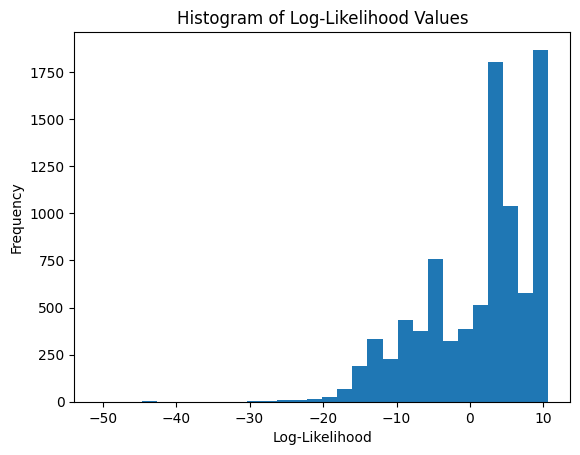

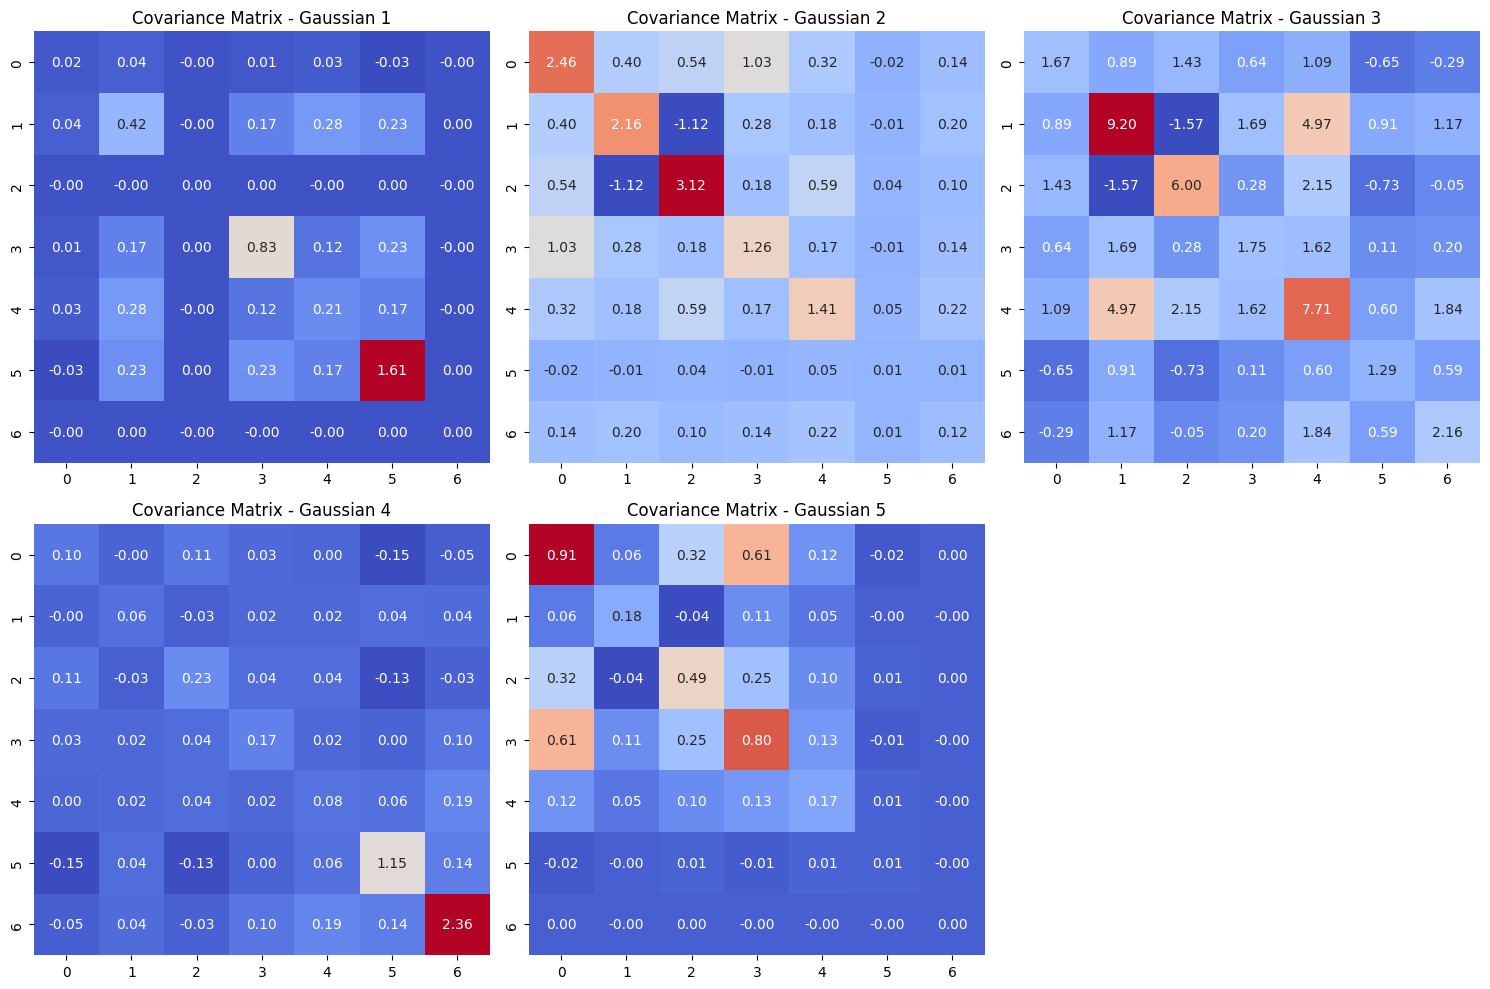

In [21]:
from sklearn.mixture import GaussianMixture

# Selecting the subset of identified variables: ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
X_subset = credit_card_data[selected_features].values

# Extract the selected data for clustering
# Replace missing values with the mean, otherwise it will give NaN error in K-Means clustering
imputer = SimpleImputer(strategy='mean')
X_subset_imputed = imputer.fit_transform(X_subset)

# Feature normalization
scaler_selected = StandardScaler()
X_subset_normalized = scaler_selected.fit_transform(X_subset_imputed)

# Using the optimal number of clusters (K*) from previous analysis
num_clusters = 5

# Fitting Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X_subset_normalized)

# Mean vector and covariance matrix for each Gaussian
mean_vectors = gmm.means_
cov_matrices = gmm.covariances_

print('Mean vectors: ', mean_vectors)

# Compute log-likelihood of each sample belonging to the GMM
log_likelihood = gmm.score_samples(X_subset_normalized)

# Plot histogram of log-likelihood values
plt.hist(log_likelihood, bins=30)
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Likelihood Values')
plt.show()

# Visualize covariance matrices using heatmaps
plt.figure(figsize=(15, 10))
for i in range(num_clusters):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(cov_matrices[i], annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
    plt.title(f'Covariance Matrix - Gaussian {i+1}')
plt.tight_layout()
plt.show()


In [45]:
mean_vectors

array([[-0.65145695,  0.03783272, -0.46678555, -0.0588896 , -0.20331975,
         0.6073191 ,  0.36067954],
       [ 1.46270815,  0.76930679,  1.029912  ,  1.22402659,  1.12148139,
        -0.47588723,  0.15467968],
       [ 0.45944266,  1.09531647,  1.36356628,  0.99314396,  1.9453713 ,
         0.44723622, -0.73472772],
       [-0.4682641 , -0.28228336, -0.10815504, -0.64285569, -0.34323143,
         0.162515  , -1.77134387],
       [ 0.38094433, -0.18191172,  0.06674513, -0.04206709, -0.14319937,
        -0.49701023,  0.36067954]])

## Mean Vectors Analysis:
1. **Cluster 0 Mean Vector:**
   - **BALANCE:** -0.651
   - **PURCHASES:** 0.038
   - **CASH_ADVANCE:** -0.467
   - **CREDIT_LIMIT:** -0.059
   - **PAYMENTS:** -0.203
   - **PRC_FULL_PAYMENT:** 0.607
   - **TENURE:** 0.361
   
2. **Cluster 1 Mean Vector:**
   - **BALANCE:** 1.463
   - **PURCHASES:** 0.769
   - **CASH_ADVANCE:** 1.030
   - **CREDIT_LIMIT:** 1.224
   - **PAYMENTS:** 1.121
   - **PRC_FULL_PAYMENT:** -0.476
   - **TENURE:** 0.155
   
3. **Cluster 2 Mean Vector:**
   - **BALANCE:** 0.459
   - **PURCHASES:** 1.095
   - **CASH_ADVANCE:** 1.364
   - **CREDIT_LIMIT:** 0.993
   - **PAYMENTS:** 1.945
   - **PRC_FULL_PAYMENT:** 0.447
   - **TENURE:** -0.735
   
4. **Cluster 3 Mean Vector:**
   - **BALANCE:** -0.468
   - **PURCHASES:** -0.282
   - **CASH_ADVANCE:** -0.108
   - **CREDIT_LIMIT:** -0.643
   - **PAYMENTS:** -0.343
   - **PRC_FULL_PAYMENT:** 0.163
   - **TENURE:** -1.771
   
5. **Cluster 4 Mean Vector:**
   - **BALANCE:** 0.381
   - **PURCHASES:** -0.182
   - **CASH_ADVANCE:** 0.067
   - **CREDIT_LIMIT:** -0.042
   - **PAYMENTS:** -0.143
   - **PRC_FULL_PAYMENT:** -0.497
   - **TENURE:** 0.361


### Interpretation:
- **Mean Vectors:** They show the average values for each feature within each cluster. For instance, Cluster 2 has higher average values for most features compared to the other clusters.


#### Cluster Comparison:
- **Cluster 0:** This cluster exhibits lower to moderate values across most features, indicating users with lower balances, limited purchase and cash advance activity, while showing a higher percentage of full payments.
- **Cluster 1:** Users in this cluster demonstrate higher balances, moderate purchase and cash advance activities, and average payments, with a relatively low percentage of full payments.
- **Cluster 2:** This cluster represents users with moderate to high balances, significantly higher purchase and cash advance behavior, notably higher credit limits, and relatively high payment activities, but with a reasonable percentage of full payments.
- **Cluster 3:** Users in this cluster show low to moderate balances, minimal purchase and cash advance activity, lower credit limits, lower payment behaviors, and a slight positive percentage of full payments.
- **Cluster 4:** This cluster indicates users with moderate balances, limited purchase and cash advance behavior, lower credit limits, lower payments, and a negative percentage of full payments.

## Covariance Matrices Analysis:

#### Understanding Relationships and Variance:
- **Diagonal Values (Variance):** The higher the value, the more significant the variance within the feature. For instance, the diagonal elements represent the variance of each feature within the clusters.
- **Off-Diagonal Values (Covariance):** These values illustrate how features are related to each other within a cluster. Larger values denote a stronger relationship between variables.

### Cluster 0:
- Features within this cluster show low to moderate variances.
- The strongest correlations lie between 'PURCHASES' and 'PAYMENTS', 'PURCHASES' and 'CASH_ADVANCE', and 'PAYMENTS' and 'CASH_ADVANCE'.
- Other features have relatively weaker correlations.

### Cluster 1:
- Features exhibit a mix of moderate to high variances.
- The strongest correlations are observed between 'BALANCE' and 'PURCHASES', 'BALANCE' and 'CREDIT_LIMIT', and 'PURCHASES' and 'CREDIT_LIMIT'.
- 'CASH_ADVANCE' seems to have weak correlations with other features.

### Cluster 2:
- This cluster displays higher variances across most features.
- The strongest correlations exist between 'BALANCE' and 'PAYMENTS', 'BALANCE' and 'CREDIT_LIMIT', and 'PURCHASES' and 'CREDIT_LIMIT'.
- 'CASH_ADVANCE' again demonstrates weaker correlations with other features.

### Cluster 3:
- Features exhibit relatively lower variances.
- 'BALANCE' and 'CREDIT_LIMIT' show moderate correlations, while other features demonstrate weaker correlations within this cluster.
- 'CASH_ADVANCE' has limited relationships with other variables.

### Cluster 4:
- Features showcase lower variances overall.
- The strongest correlations appear between 'BALANCE' and 'PAYMENTS', 'BALANCE' and 'CREDIT_LIMIT', and 'PURCHASES' and 'CREDIT_LIMIT'.
- 'CASH_ADVANCE' maintains weaker relationships with other features.

### General Observations:
- For all clusters, 'BALANCE', 'PURCHASES', and 'CREDIT_LIMIT' frequently display strong correlations.
- 'CASH_ADVANCE' tends to exhibit weaker correlations with other features across clusters, indicating its relative independence within these segments.
- The diagonal elements represent variances of each feature within the clusters, with the off-diagonal elements depicting the relationships between features.


### Insights and Implications:

#### Financial Behavior Patterns:
1. **Diverse Financial Behavior:** The clusters exhibit diverse financial behaviors, ranging from responsible payment behaviors (Cluster 0) to high-spending patterns with mixed payment habits (Clusters 1, 2), and even clusters with minimal activity (Clusters 3, 4).
2. **Varying Payment Habits:** The clusters show variations in payment habits, from users who tend to make full payments (Cluster 0, slight in Cluster 3) to those with no or partial full payment behavior (Clusters 1, 2, 4).

#### Segment Characteristics:
1. **High-Spending, Varied Payment Habits:** Clusters 1 and 2 demonstrate higher spending patterns, although with different payment behaviors.
2. **Low Activity with Mixed Payment Habits:** Clusters 3 and 4 depict users with lower activity levels and diverse payment habits.

#### Business Implications:
- **Targeted Strategies:** Understanding these clusters helps in devising targeted marketing or financial strategies. For instance, Cluster 0 might respond well to loyalty programs promoting full payments, while Clusters 1 and 2 might benefit from credit limit increases or installment payment options.
- **Risk Assessment:** Clusters with lower payments (Clusters 3, 4) might pose higher credit risk, while those with varied payment habits (Clusters 1, 2) might need tailored credit management approaches.


## Log-likelihood
A skewed distribution with 2 peaks indicates that the log-likelihood values might not be following a typical normal distribution. Here's a breakdown of what these observations might indicate:

1. **Skewed Distribution:** The skewed nature suggests that the log-likelihood values are not symmetrically distributed around the mean. This could imply that the data might not fit a standard Gaussian distribution perfectly.

2. **Multiple Peaks:** Having two prominent peaks around 10 and between 4 and 5 might indicate the existence of distinct groups within the data or different levels of fit for these groups within the Gaussian mixture model. These peaks suggest that there could be clusters or subpopulations in the data that the model is capturing differently.

3. **Values at Extremes:** The presence of values ending around -30 and -42 suggests that there might be outliers or extremely low likelihoods for some samples in the dataset. These outliers could represent instances where the model has a poor fit or struggles to assign a likelihood to certain data points.

Overall, this distribution pattern provides valuable insights into how well the Gaussian mixture model captures the underlying structure of the data. It suggests potential clusters or groups and identifies outliers or instances where the model might be less accurate.